# Linear Regression Model building

## Importing Libraries

In [76]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading &  Data Understanding

In [77]:
#Importing dataset
df=pd.read_csv('day.csv')


In [78]:
#checking for number of rows and columns
df.shape

(730, 16)

In [79]:
#checking top five rows of the dataset for insight
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [80]:
#checking info of columns to get data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [81]:
#getting statistical summary for dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning

### Checking for missing columns

In [82]:
#checking for missing values 
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values

### Dropping unwanted columns

In [83]:
#dropping 'Instant' column as it has no necessary information other than index for the row
#dropping 'dteday' column as we already have other columns with similar information like year,months and weekday
#dropping 'casual' and 'registered' columns as we have target column cnt,which has data of these two columns combined already.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [84]:
df.head() #Inspecting data after dropping the columns

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping non-binary categorical columns to their original values from data dictionary

In [86]:
df.nunique()#Inspecting columns to find non binary categorical columns

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [87]:
#mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

#mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty_Cloudy',3:'Light_SnowRain',4:'Heavy_SnowRain'})

In [88]:
#Inspecting data after mapping data
df.sample(10)# We are using sample function to get variaty of rows for inspection

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
601,fall,1,aug,0,sat,0,Misty_Cloudy,27.128347,30.93480,71.2917,16.375336,6053
641,winter,1,oct,0,thu,1,Misty_Cloudy,26.957500,30.39875,72.2917,7.875582,7328
598,fall,1,aug,0,wed,1,Clear,27.367500,31.09270,67.7083,4.708981,7375
368,spring,1,jan,0,wed,1,Misty_Cloudy,4.407500,5.96685,41.4583,12.374900,2368
432,spring,1,mar,0,fri,1,Misty_Cloudy,16.844153,19.85415,40.7083,27.791600,4569
328,winter,0,nov,0,fri,1,Clear,15.375000,19.03355,64.3750,6.626019,2792
76,spring,0,mar,0,fri,1,Clear,22.140000,26.35045,52.5217,15.478139,3239
573,fall,1,july,0,sat,0,Clear,30.989153,34.88020,61.3333,10.542450,6685
149,summer,0,may,1,mon,0,Clear,30.066653,33.55460,68.5000,8.792075,4098
467,summer,1,apr,0,fri,1,Clear,18.142500,21.59040,40.8333,10.416557,6398


In [89]:
# check the column info of the dataset to get data types of the columns to group them accordingly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [90]:
#Creating categorical columns and continuous columns to analyse dataframe using Exploratory data analysis
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=["temp","atemp","hum","windspeed"]
target=["cnt"]
len(cat_cols)+len(cont_cols)+len(target)

12

## Exploratory Data Analysis

## Univariate Analysis

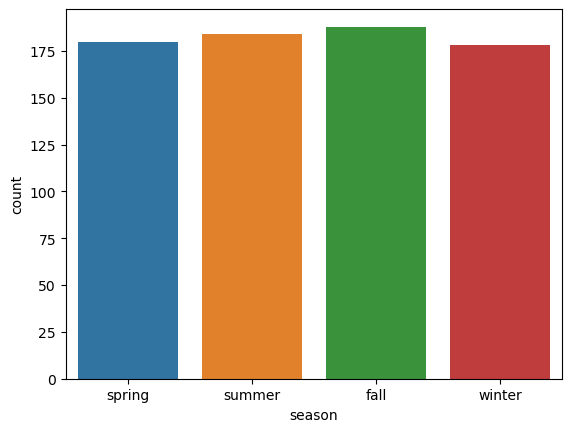

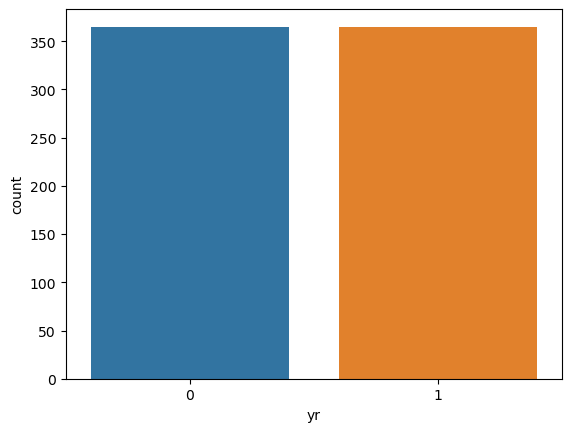

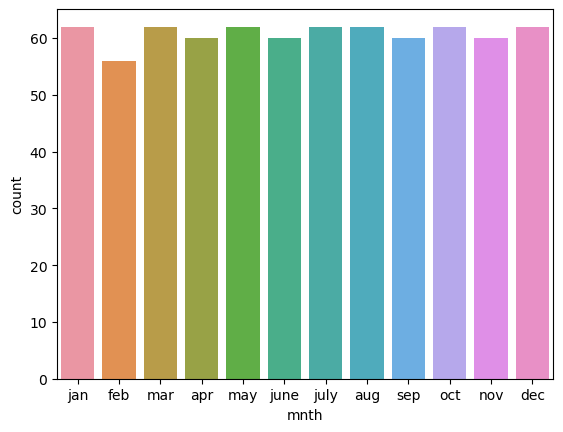

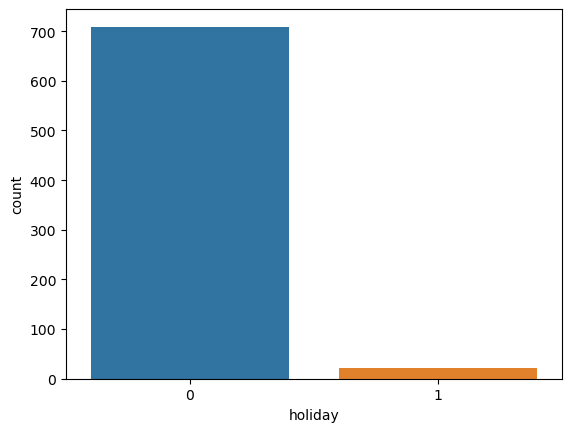

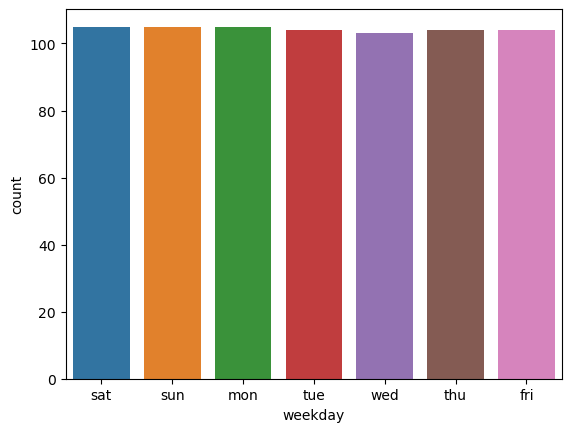

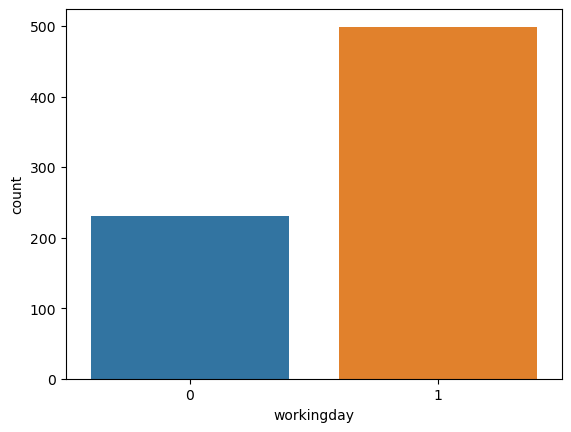

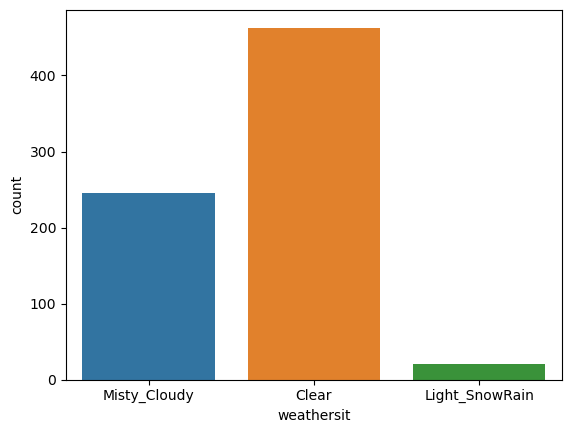

In [148]:
#Analysing categorical columns
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

From above graph we can infer that:
1. "summer" season has the highest frequency, followed by "fall", "spring", and "winter".
2. Majority of the days have "Clear" weather, followed by "Mist + Cloudy," weather.
3. There are almost equal number of bike rentals in both the years  2018 to 2019
4. The countplot shows that the distribution of bike rentals across months is uneven. The highest bike rentals are in the months of June, July, and August.The lowest bike rentals are in the month of February.
5. People tend to rent bikes more frequently on non-holiday days.
6. There is a somewhat even distribution of bike rentals across weekdays, with a slightly higher number of rentals on weekdays compared to weekends.
7. The countplot shows that there are more rentals on working days than non-working days.

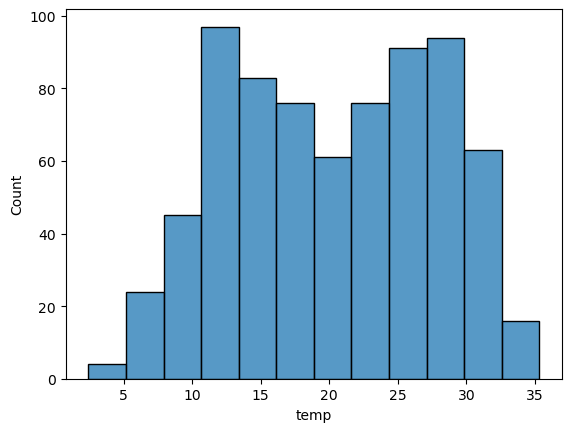

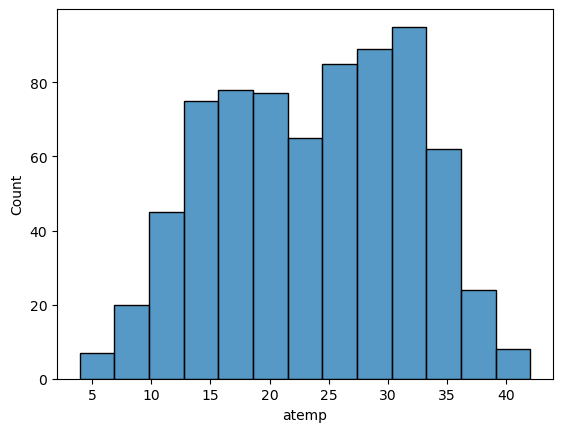

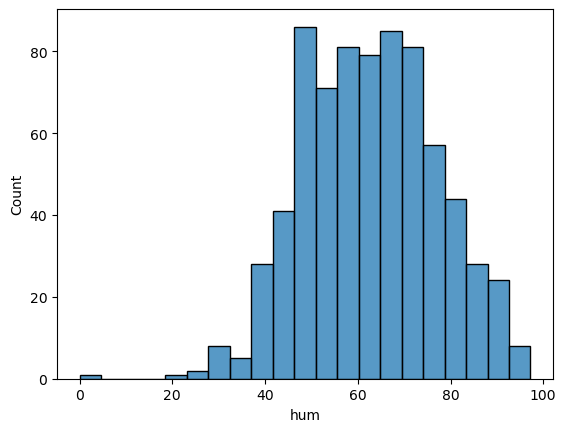

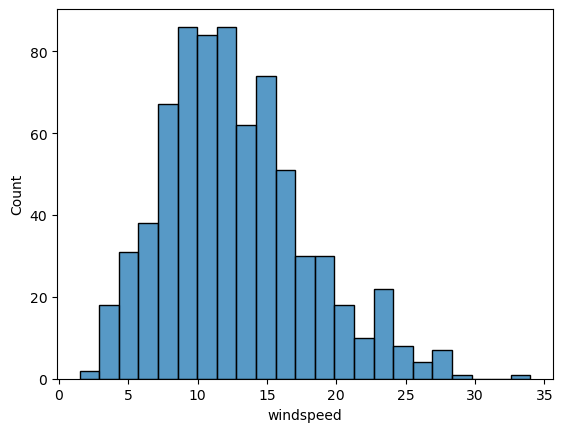

In [147]:
#For analysing continous columns 
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

From the above Univariate analysis we can infer that:
1. 'temp' and 'atemp' are similarly distributed.
2. "hum" i.e humidity is somewhat normally distributed, but count has decreased towards higher humidity levels .
3. "windspeed" is also somewhat normally distributed, but has high number of frequency around 10.


## Bivariate Analysis

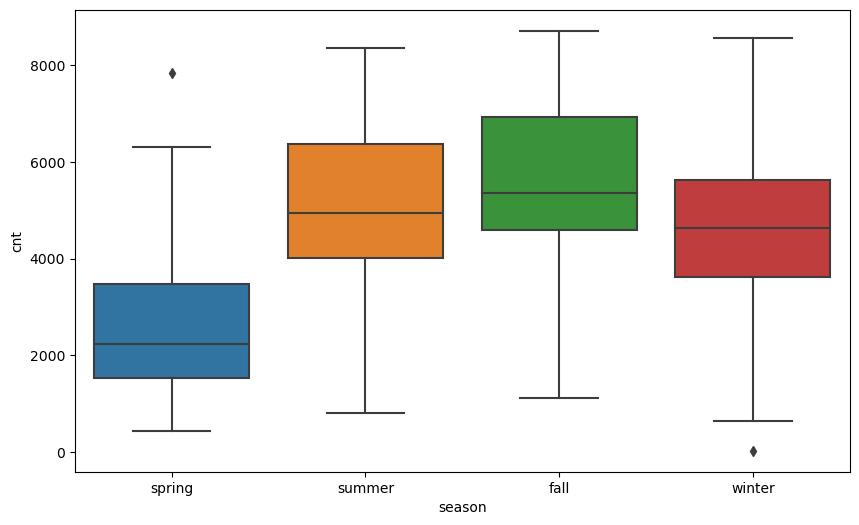

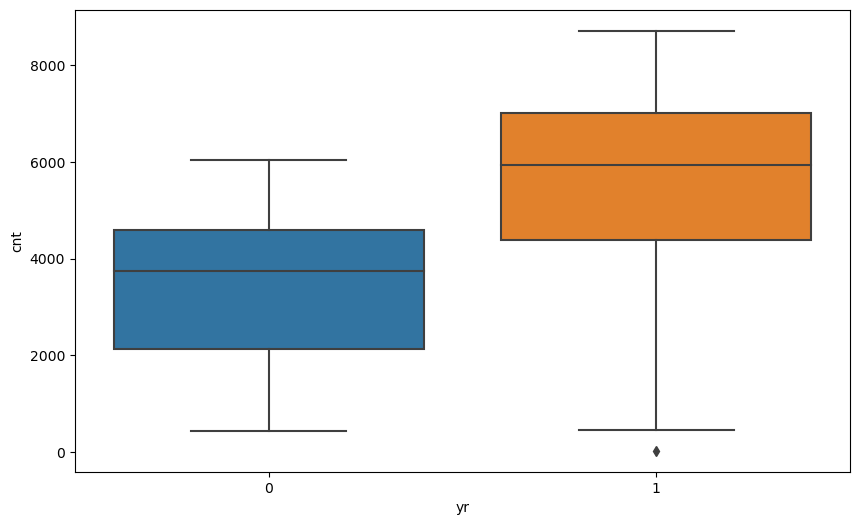

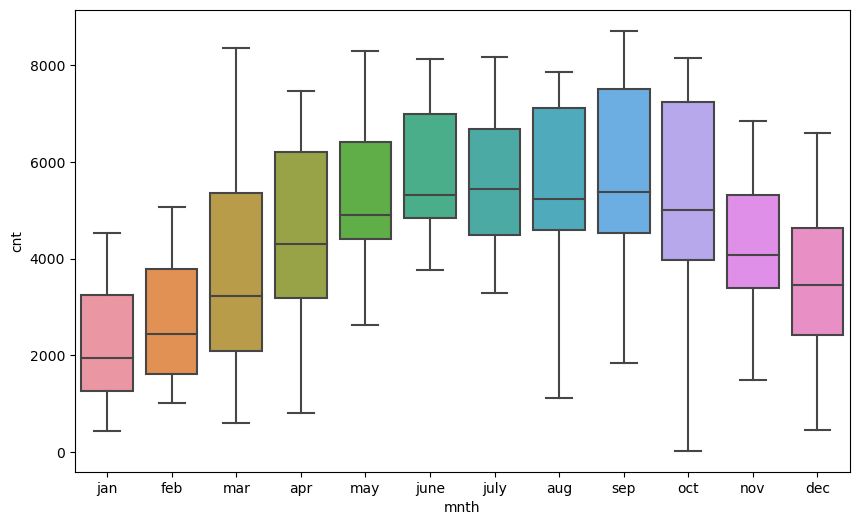

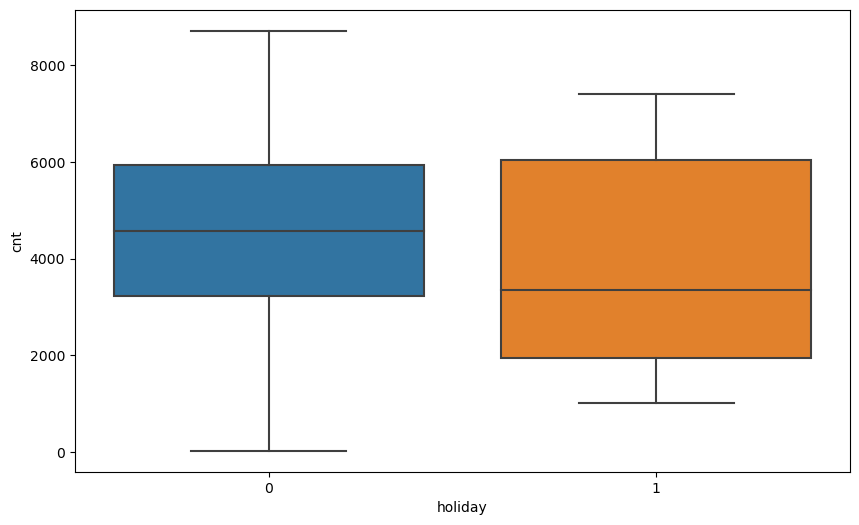

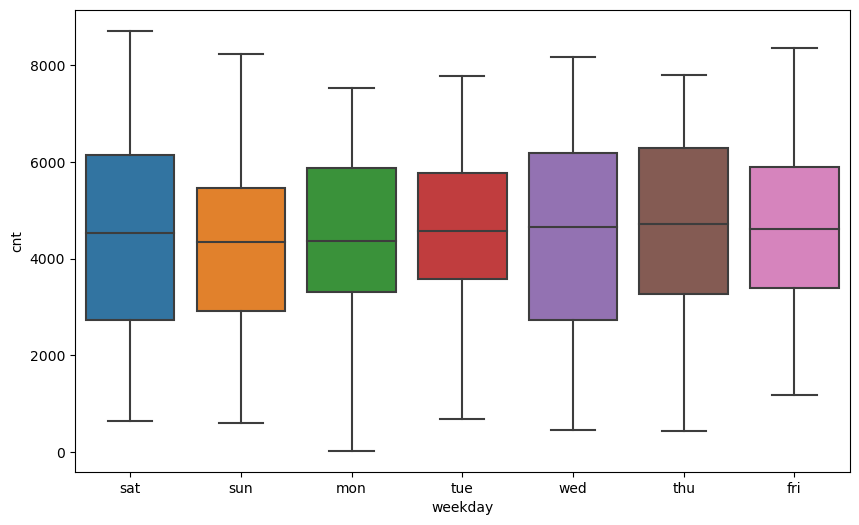

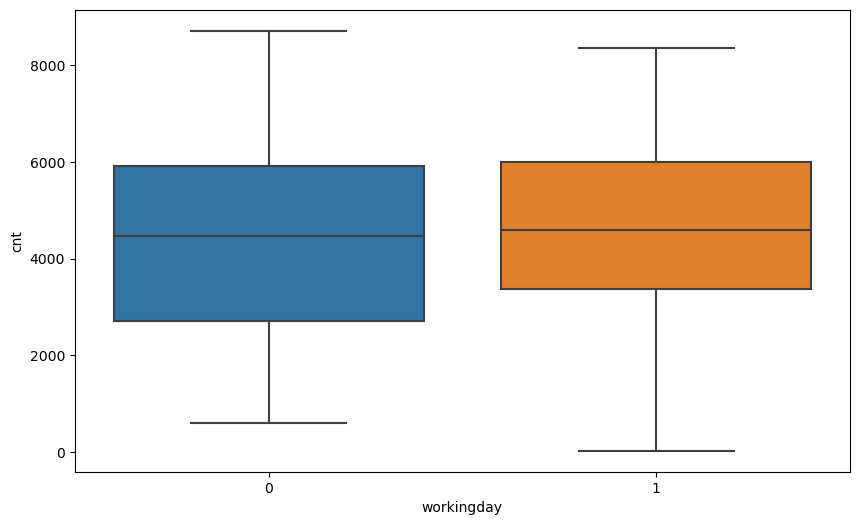

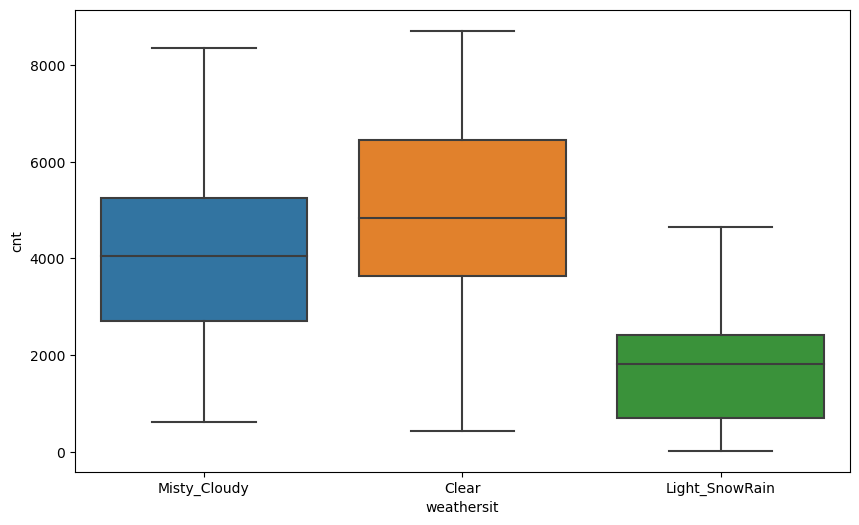

In [150]:
#Analysing categorical columns w.r.t to target column 'cnt'
for i in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[i],df["cnt"])
    plt.show()

From above graph we can infer that:
1. Highest demand for bikes is found in Fall
2. demand for bikes has increased exponentially from 2018 to 2019
3. September has the most demand for renting Bikes,january being the lowest.
4. Demand is decreased during holidays
5. Thursday and saturday seems to have the most demand for bikes followed by wednesday,friday and monday.
7. Most booking is recived on clear wheather.

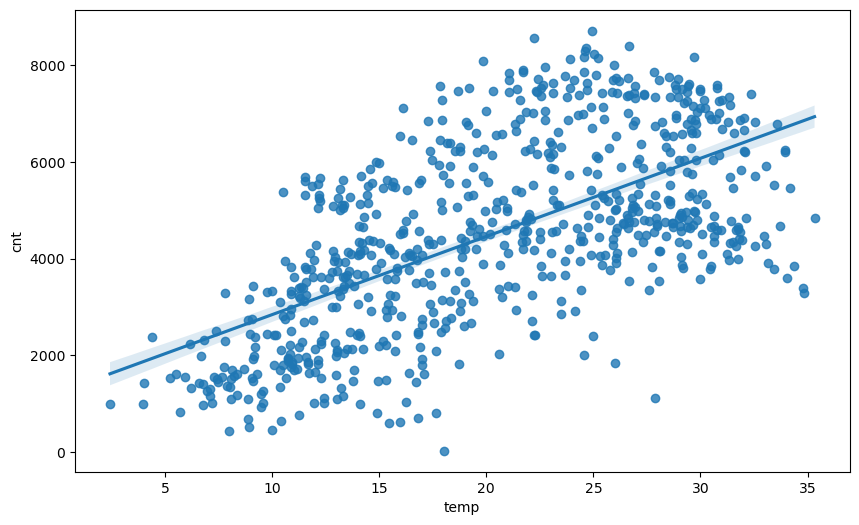

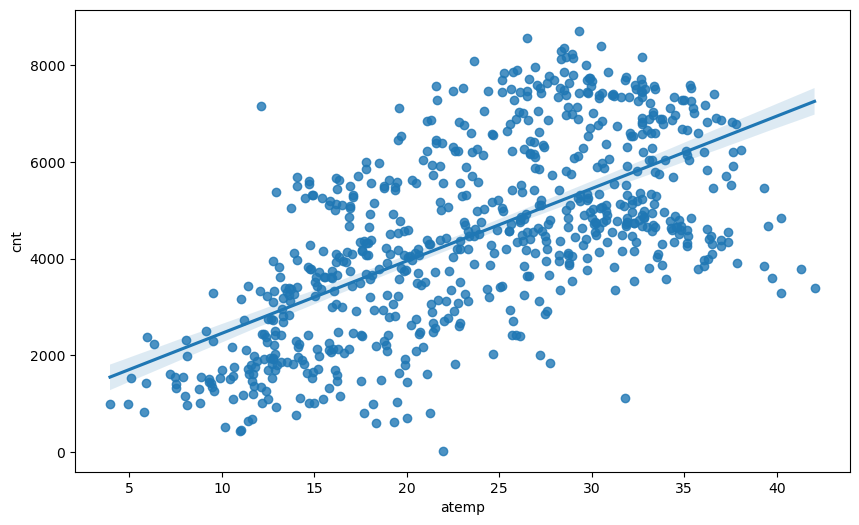

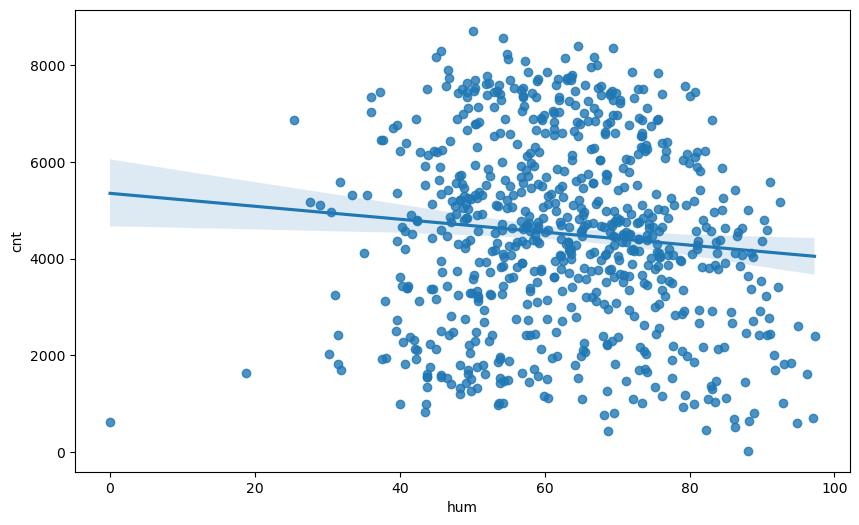

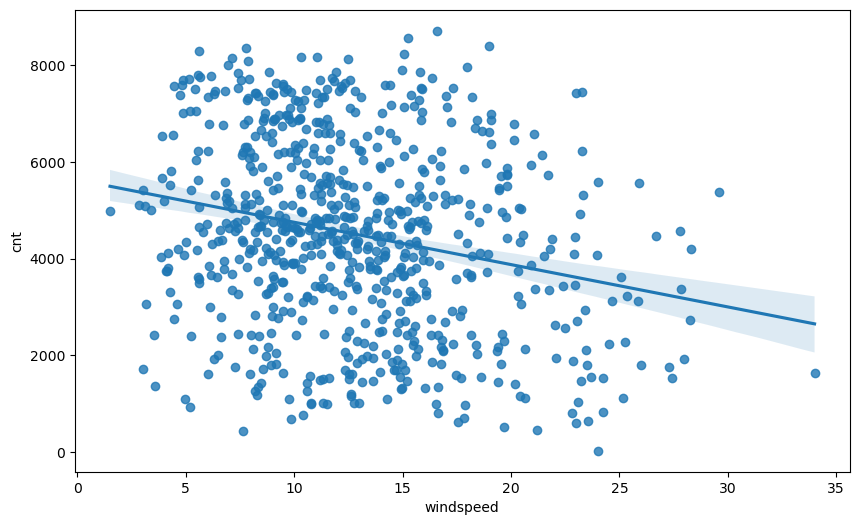

In [149]:
#Analysing continuous columns w.r.t to target column'cnt'
for i in cont_cols:
    plt.figure(figsize=(10, 6))
    sns.regplot(df[i],df["cnt"])
    plt.show()

From the above graph we can infer that:
1. Demand for bikes is positively correlated to temperature.We can also infer that number of bookings increase as their is increase in tempearature
2. Humidity and windspeed is randomly scattered, but we can see that as humidity and windspeed increases the demand of bikes decrease.

## Multivariate Analysis

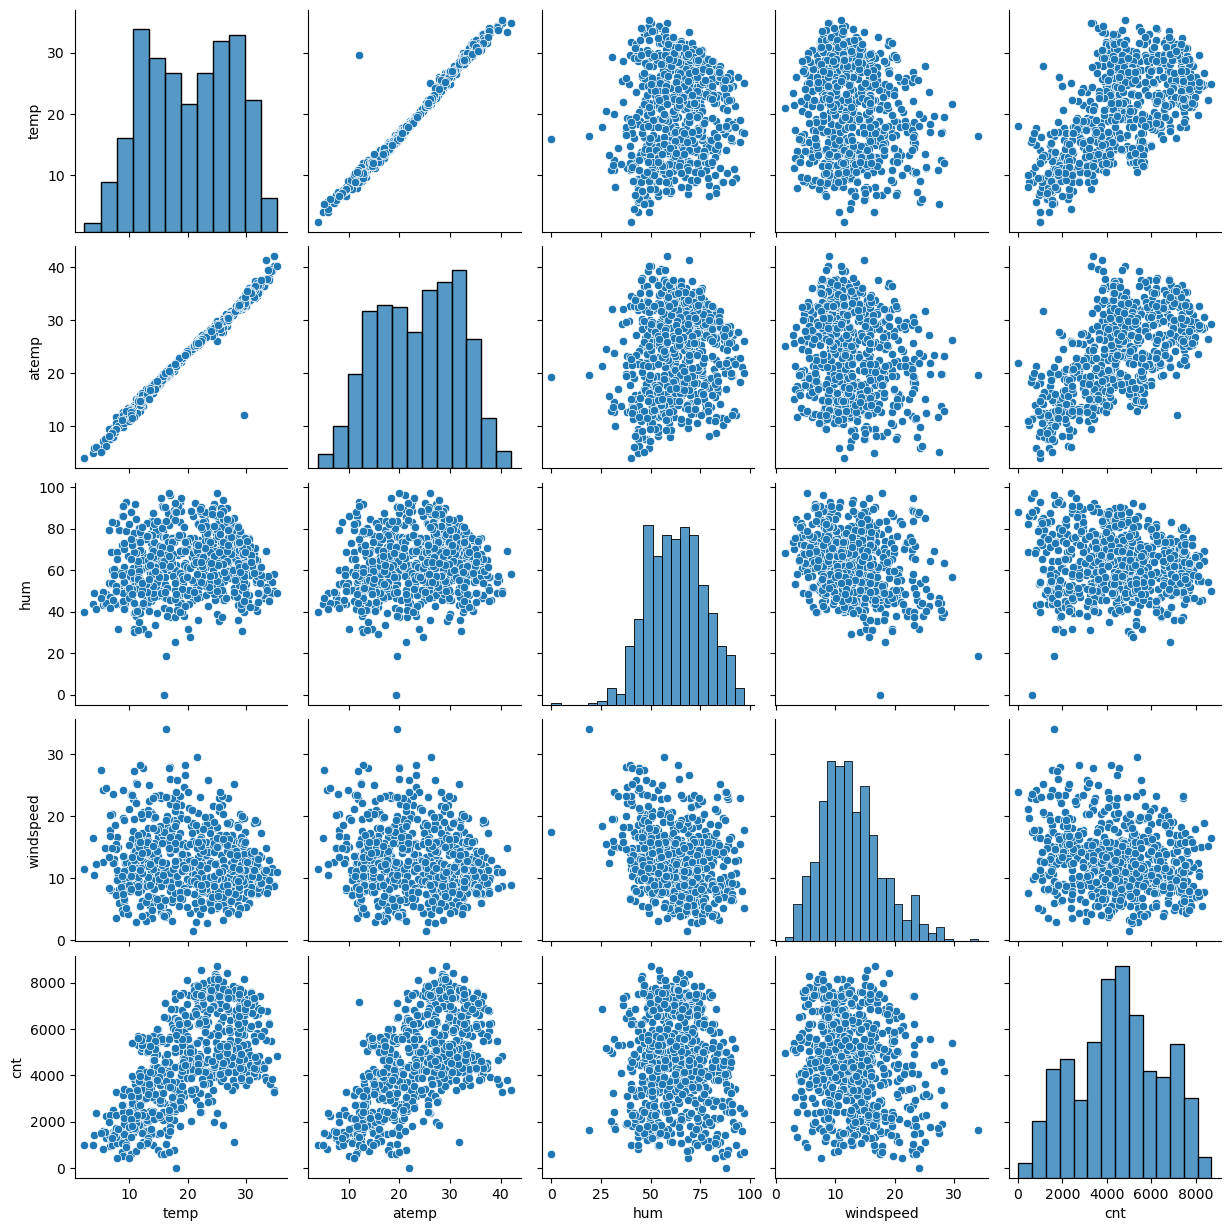

In [95]:
# Analysing the numerical columns through pairplot
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

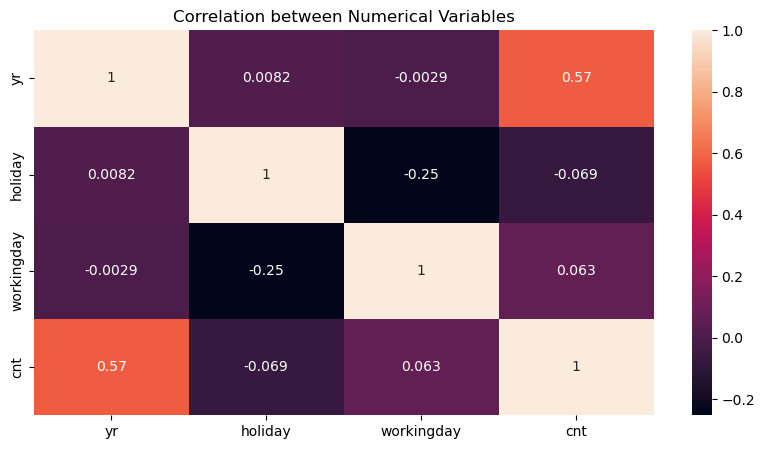

In [96]:
#Checking the correalation between the categorical variables
plt.figure(figsize=(10,5))
sns.heatmap(df[cat_cols+["cnt"]].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

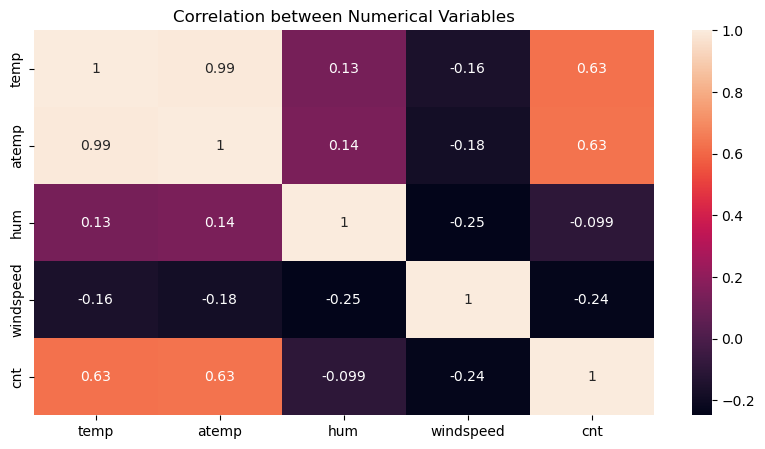

In [20]:
#Checking the correalation between the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

1. From the above heatmap we can infer that 'temp' and 'atemp' have highest correalation with target columns
2. temp and atemp, both of the parameters cannot be used in the model due to multicolinearity.hence, we have to decide in the later analysis which parameters to keep and drop. 

## Pre-processing of data for building Linear Model

## Dummy Variable Creation

In [97]:
## Creating dummy columns for all the non-binary categorical columns
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [98]:
#Dummy variable creation for non binary categorical columns
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [99]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [100]:
#columns after creating dummies
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'aug', 'dec',
       'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'Light_SnowRain', 'Misty_Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [101]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [102]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [103]:
# Inspecting new dataframe after adding dummy variable columns and dropping the original columns of dummy vriables

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty_Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [104]:
# check the shape of new dataframe
df_new.shape

(730, 30)

In [106]:
#columns of new dataframe
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_SnowRain', 'Misty_Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

# Linear Model Building

## Train-Test Split

In [107]:
#Assigning X and Y 
X=df_new.drop(["cnt"],axis=1)
y=df_new["cnt"]

In [108]:
# splitting the dataframe into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [109]:
# check the shape of test datatset
X_test.shape

(219, 29)

In [110]:
# check the shape of train datatset
X_train.shape

(511, 29)

## Scaling
scaling to ensure that all predictor variables have equal importance and to avoid biased coefficients.

In [111]:
#Standardization
#z=x-xmean/sigma
#Scaling training data set
X_train=(X_train-X_train.mean())/X_train.std()

In [112]:
#Scaling test data set
X_test=(X_test-X_test.mean())/X_test.std()

## Modelling

## Feature Selection

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True])

Feature selection using Recursive Feature Elimination (RFE) can potentially remove the column that has high multicollinearity with another column. RFE selects the best features by recursively considering smaller and smaller sets of features based on their importance to the target variable, which can help eliminate the redundant or less important features.

In [114]:
#total columns of x_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_SnowRain',
       'Misty_Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [115]:
#Columns remaining after Recursive feature Elimination (RFE)
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'july',
 'sep',
 'sat',
 'sun',
 'Light_SnowRain',
 'Misty_Cloudy',
 'spring',
 'summer',
 'winter']

In [116]:
#Assigning selected features to training and test data 
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [117]:
#adding constant to to get best fit 
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [118]:
#Creating model 1
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          7.31e-192
Time:                        17:53:16   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     34.266    131.072      0.000    4423.979    4558.628
yr              1001.3368     34.898     28.693      0.000     932.770    1069.903
holiday         -122.4457     32.941     -3.717      0.000    -187.166     -57.725
workingday        54.2112     19.357      2.801      0.005      16.179      92.243
temp            1036.6669     65.218     15.895      0.000     908.529    1164.805
hum             -205.1936     47.363     -4.332      0.000    -298.251    -112.136
windspeed       -266.7696     37.511     -7.112      0.000    -340.470    -193.069
july            -126.6372     41.835     -3.027      0.003    -208.833     -44.441
sep              193.3369     39.059      4.950      0.000     116.596     270.078
sat               72.1211     25.885      2.786      0.006      21.263     122.979
sun              -91.8521     26.483     -3.468      0.001    -143.885     -39.819
Light_SnowRain  -360.4550     38.338     -9.402      0.000    -435.780    -285.130
Misty_Cloudy    -234.1803     42.977     -5.449      0.000    -318.620    -149.741
spring          -205.8099     76.861     -2.678      0.008    -356.824     -54.796
summer           201.9132     55.555      3.634      0.000      92.761     311.065
winter           378.2388     64.127      5.898      0.000     252.245     504.232
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                     4.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

let's do Variance inflation factors to remove columns which have multicollinearity 

In [119]:
#calculating Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.035215
2,holiday,inf
3,workingday,inf
4,temp,3.615446
5,hum,1.906795
6,windspeed,1.196046
7,july,1.487669
8,sep,1.296755
9,sat,inf


In [120]:
#We will drop 'HOLIDAY' column as it's Vif value is greater i.e infinity
X_train_sm=X_train_sm.drop(["holiday"],axis=1)
X_test_sm=X_test_sm.drop(["holiday"],axis=1)

In [121]:
#Creating model 2
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          7.31e-192
Time:                        17:57:33   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     34.266    131.072      0.000    4423.979    4558.628
yr              1001.3368     34.898     28.693      0.000     932.770    1069.903
workingday       417.8224    103.352      4.043      0.000     214.762     620.883
temp            1036.6669     65.218     15.895      0.000     908.529    1164.805
hum             -205.1936     47.363     -4.332      0.000    -298.251    -112.136
windspeed       -266.7696     37.511     -7.112      0.000    -340.470    -193.069
july            -126.6372     41.835     -3.027      0.003    -208.833     -44.441
sep              193.3369     39.059      4.950      0.000     116.596     270.078
sat              353.2547     84.441      4.183      0.000     187.349     519.161
sun              180.2650     82.172      2.194      0.029      18.816     341.714
Light_SnowRain  -360.4550     38.338     -9.402      0.000    -435.780    -285.130
Misty_Cloudy    -234.1803     42.977     -5.449      0.000    -318.620    -149.741
spring          -205.8099     76.861     -2.678      0.008    -356.824     -54.796
summer           201.9132     55.555      3.634      0.000      92.761     311.065
winter           378.2388     64.127      5.898      0.000     252.245     504.232
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#calculating Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.035215
2,workingday,9.079375
3,temp,3.615446
4,hum,1.906795
5,windspeed,1.196046
6,july,1.487669
7,sep,1.296755
8,sat,6.060785
9,sun,5.739480


In [123]:
#We will drop 'workingday' column as it's Vif value is greater infinity
X_train_sm=X_train_sm.drop(["workingday"],axis=1)
X_test_sm=X_test_sm.drop(["workingday"],axis=1)

In [124]:
#Creating model 3
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.50e-189
Time:                        17:59:49   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     497   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     34.791    129.094      0.000    4422.948    4559.659
yr              1003.3932     35.429     28.321      0.000     933.784    1073.003
temp            1039.7600     66.213     15.703      0.000     909.668    1169.852
hum             -206.5433     48.088     -4.295      0.000    -301.023    -112.063
windspeed       -270.2998     38.076     -7.099      0.000    -345.109    -195.491
july            -124.8406     42.474     -2.939      0.003    -208.291     -41.390
sep              184.8919     39.600      4.669      0.000     107.087     262.697
sat               42.5248     35.501      1.198      0.232     -27.227     112.276
sun             -120.1631     35.606     -3.375      0.001    -190.120     -50.206
Light_SnowRain  -353.1911     38.883     -9.083      0.000    -429.586    -276.796
Misty_Cloudy    -225.6479     43.583     -5.177      0.000    -311.277    -140.019
spring          -215.1638     78.003     -2.758      0.006    -368.421     -61.907
summer           203.5235     56.405      3.608      0.000      92.703     314.344
winter           367.6978     65.055      5.652      0.000     239.881     495.515
==============================================================================
Omnibus:                       80.144   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.959
Skew:                          -0.779   Prob(JB):                     9.41e-47
Kurtosis:                       5.743   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#We can see that p value of 'sat' column  is greater than 0.05 so we will remove it
X_train_sm=X_train_sm.drop(["sat"],axis=1)
X_test_sm=X_test_sm.drop(["sat"],axis=1)

In [126]:
#Creating model 4
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.02e-190
Time:                        18:00:16   Log-Likelihood:                -4125.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     498   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     34.806    129.038      0.000    4422.918    4559.688
yr              1001.9411     35.424     28.284      0.000     932.342    1071.540
temp            1038.6208     66.235     15.681      0.000     908.486    1168.755
hum             -208.6717     48.076     -4.340      0.000    -303.128    -114.216
windspeed       -268.8092     38.072     -7.061      0.000    -343.611    -194.008
july            -123.8404     42.484     -2.915      0.004    -207.310     -40.370
sep              185.0419     39.617      4.671      0.000     107.204     262.880
sun             -127.5596     35.082     -3.636      0.000    -196.487     -58.633
Light_SnowRain  -352.2743     38.892     -9.058      0.000    -428.687    -275.861
Misty_Cloudy    -224.4659     43.591     -5.149      0.000    -310.110    -138.822
spring          -215.1210     78.037     -2.757      0.006    -368.444     -61.798
summer           203.1810     56.428      3.601      0.000      92.314     314.048
winter           368.8378     65.077      5.668      0.000     240.979     496.696
==============================================================================
Omnibus:                       75.990   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.803
Skew:                          -0.726   Prob(JB):                     2.77e-46
Kurtosis:                       5.783   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#checkin VIF factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.033783
2,temp,3.614202
3,hum,1.904097
4,windspeed,1.194122
5,july,1.486926
6,sep,1.293033
7,sun,1.013927
8,Light_SnowRain,1.246128
9,Misty_Cloudy,1.565393


In [128]:
#removing spring coulmn as it's VIF factor is more than 5
X_train_sm=X_train_sm.drop(["spring"],axis=1)
X_test_sm=X_test_sm.drop(["spring"],axis=1)

In [129]:
#Creating model 5
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.49e-190
Time:                        18:00:53   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     499   BIC:                             8334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     35.036    128.193      0.000    4422.468    4560.139
yr               995.6871     35.584     27.981      0.000     925.774    1065.600
temp            1174.9475     44.352     26.492      0.000    1087.809    1262.086
hum             -223.5573     48.086     -4.649      0.000    -318.034    -129.081
windspeed       -279.8554     38.110     -7.343      0.000    -354.731    -204.980
july            -101.4164     41.973     -2.416      0.016    -183.882     -18.951
sep              216.1359     38.228      5.654      0.000     141.028     291.244
sun             -128.3809     35.312     -3.636      0.000    -197.759     -59.002
Light_SnowRain  -344.5356     39.046     -8.824      0.000    -421.251    -267.820
Misty_Cloudy    -213.9470     43.709     -4.895      0.000    -299.824    -128.070
summer           312.4811     40.415      7.732      0.000     233.076     391.886
winter           511.3586     39.783     12.854      0.000     433.197     589.521
==============================================================================
Omnibus:                       69.480   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.076
Skew:                          -0.705   Prob(JB):                     1.93e-37
Kurtosis:                       5.439   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
#checking VIF factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.029543
2,temp,1.599373
3,hum,1.880075
4,windspeed,1.180893
5,july,1.432413
6,sep,1.188217
7,sun,1.013854
8,Light_SnowRain,1.239635
9,Misty_Cloudy,1.553398


The above model5 can be used for predicting factors affecting bike sharing demand as it has low p_values and Vif value is less than five

In [154]:
# Checking the parameters and their coefficient values
res5.params

const             4491.303327
yr                 995.687099
temp              1174.947450
hum               -223.557259
windspeed         -279.855449
july              -101.416425
sep                216.135916
sun               -128.380884
Light_SnowRain    -344.535610
Misty_Cloudy      -213.946998
summer             312.481087
winter             511.358613
dtype: float64

## Residual Analysis of the train data and validation

In [156]:
X_train_sm

,const,yr,temp,hum,windspeed,july,sep,sun,Light_SnowRain,Misty_Cloudy,summer,winter
653,1.0,0.981578,-0.121872,-0.514471,-0.118194,-0.287168,-0.295065,-0.407849,-0.173732,-0.724117,-0.571518,1.737154
576,1.0,0.981578,1.231091,0.516671,-0.331046,3.475468,-0.295065,-0.407849,-0.173732,-0.724117,-0.571518,-0.574528
426,1.0,0.981578,-0.420993,-0.069607,-0.386122,-0.287168,-0.295065,-0.407849,-0.173732,1.378290,-0.571518,-0.574528
728,1.0,0.981578,-1.295360,-1.044770,2.017592,-0.287168,-0.295065,2.447092,-0.173732,-0.724117,-0.571518,-0.574528
482,1.0,0.981578,-0.628079,-1.000578,-0.780297,-0.287168,-0.295065,-0.407849,-0.173732,1.378290,1.746304,-0.574528
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.981578,1.447383,0.201433,-0.788167,-0.287168,-0.295065,-0.407849,-0.173732,-0.724117,-0.571518,-0.574528
53,1.0,-1.016774,-1.483637,-1.471059,-1.234769,-0.287168,-0.295065,-0.407849,-0.173732,-0.724117,-0.571518,-0.574528
350,1.0,-1.016774,-1.281554,-0.496794,0.654163,-0.287168,-0.295065,-0.407849,-0.173732,1.378290,-0.571518,1.737154
79,1.0,-1.016774,-0.331156,0.751586,1.232246,-0.287168,-0.295065,-0.407849,-0.173732,1.378290,1.746304,-0.574528


In [159]:
predicted_value1=res5.predict(X_train_sm)

## Normality of error terms

Text(0.5, 0, 'Errors')

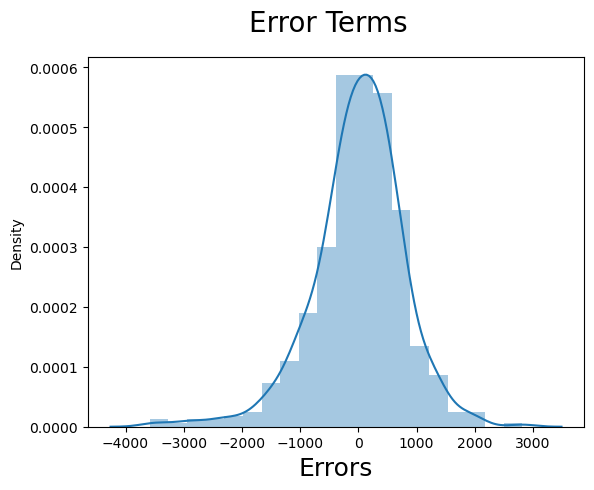

In [160]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - predicted_value1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

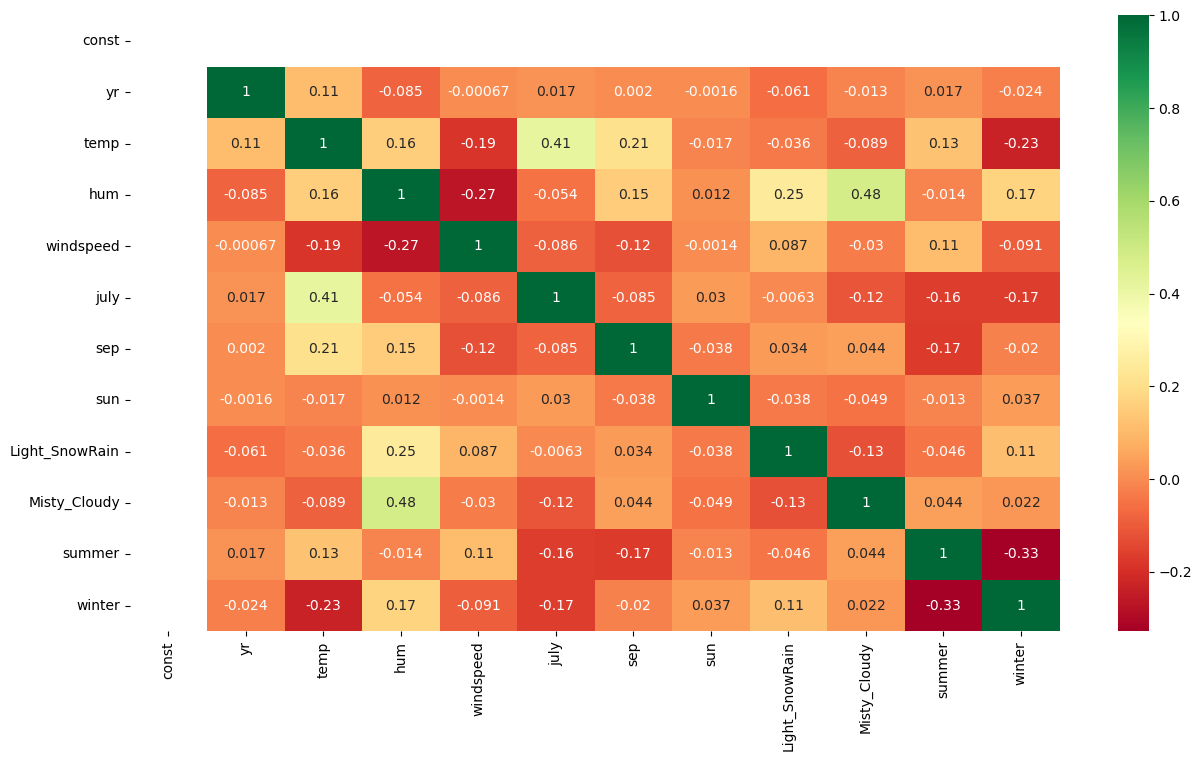

In [163]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no multicolinearity as seen from the heatmap.

Linearity

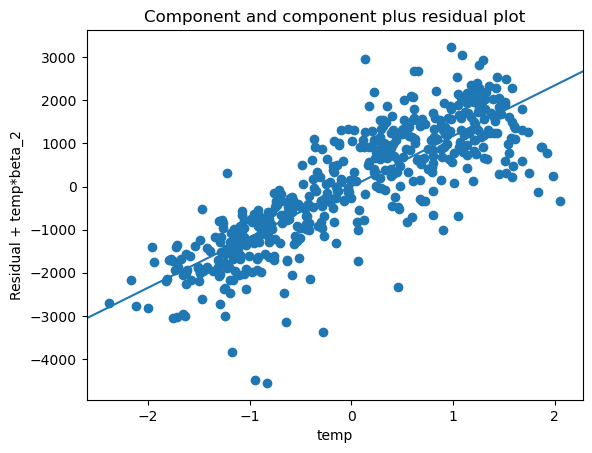

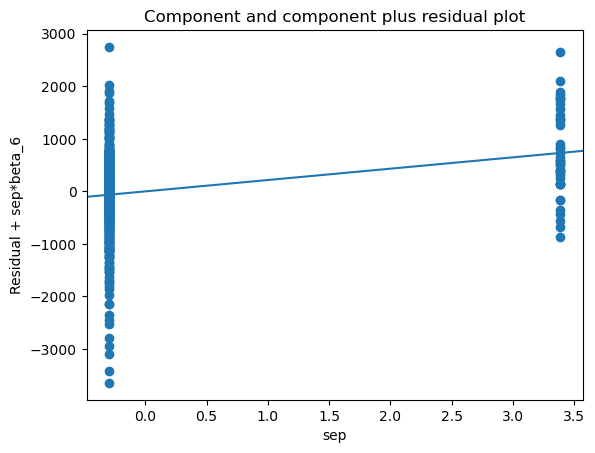

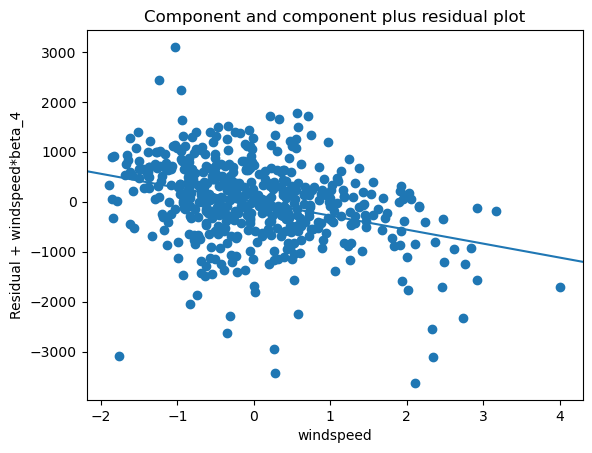

In [164]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(res5, 'temp')
plt.show()

sm.graphics.plot_ccpr(res5, 'sep')
plt.show()

sm.graphics.plot_ccpr(res5, 'windspeed')
plt.show()


From the CCPR plots shown above,
1. we can see that there is a linear relationship between the response variable 'cnt' and predictor variables 'temp', 'sep' and 'windspeed'.
2. In each plot, the points are clustered closely around the regression line, indicating a strong linear relationship. This suggests that these variables are good predictors of bike sharing demand.

## Homoscedasticity

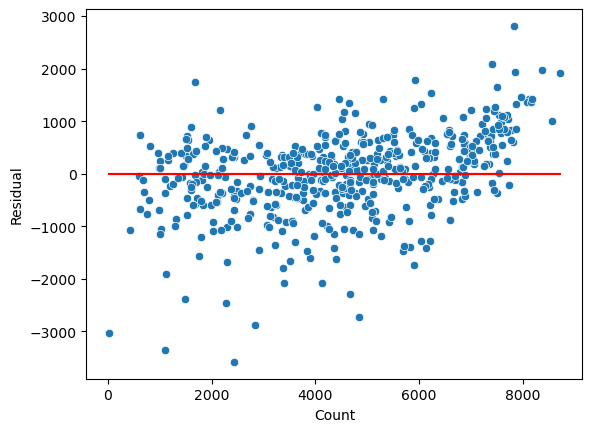

In [165]:
predicted_value1 = res5.predict(X_train_sm)
residual = y_train - predicted_value1
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

The scatter plot of residuals against predicted values has relatively uniform spread across the range of predicted values, indicating that the assumption of homoscedasticity is met.

 Making Predictions Using the Final Model

In [166]:
## Model is ready
predicted_value=res5.predict(X_test_sm)

In [167]:
#Finding test performance
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 80.14 %


## Model Evaluation

In [ ]:
#Plotting graphs between actual vs predicted values

Text(0, 0.5, 'predicted_value')

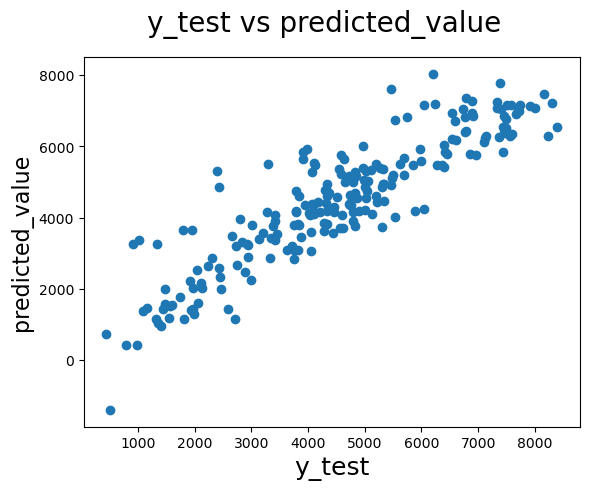

In [168]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, predicted_value)
fig.suptitle('y_test vs predicted_value', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('predicted_value', fontsize = 16) 

In [169]:
round(res5.params,4)

const             4491.3033
yr                 995.6871
temp              1174.9475
hum               -223.5573
windspeed         -279.8554
july              -101.4164
sep                216.1359
sun               -128.3809
Light_SnowRain    -344.5356
Misty_Cloudy      -213.9470
summer             312.4811
winter             511.3586
dtype: float64

In [170]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2)

0.7898


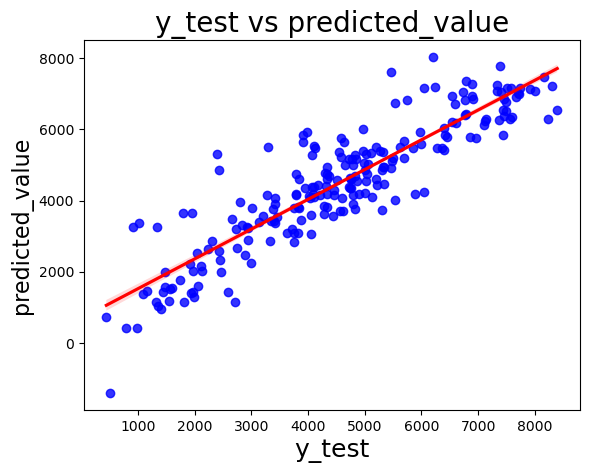

In [171]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs predicted_value', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('predicted_value', fontsize=16)
plt.show()

scatter plot shows a linear relationship with a slope close to 1,indicating thatmodel has performed well in predicting the target variable 'cnt'.

## test Performance

In [ ]:
predicted_value=res5.predict(X_test_sm)

In [176]:
#Calculating test dataset performance
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 80.14 %


In [177]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2)

0.7898


### calculating factors for train dataset

In [178]:
# R-SQUARE OF TRAIN DATA 
predicted_value1=res5.predict(X_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 83.92 %


In [179]:
# Calculating Adjusted-R^2 value for the train dataset

adjusted_r2 = round(1-(1-r2_score(y_train, predicted_value1))*(X_train_sm.shape[0]-1)/(X_train_sm.shape[0]-X_train_sm.shape[1]-1),4)
print(adjusted_r2)

0.8353


Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8391
- Test dataset R^2           : 0.8013
- Train dataset Adjusted R^2 : 0.8353    
- Test dataset Adjusted R^2  : 0.7898

## Conclusion

From the above Analysis of the dataset and model 
We can infer that:
1.Working days and weekdays have high demand of bike sharing.
2.Holidays has lowest demand for,hence,reducing the price on holidays might attract more customers.
3.Rainy days or cloudy days have lowest demand
4.Clear weather has the highest demand for the bikes
5.Humidity has low impact but as the humidity increases the demand does increase.
6.Temperature has the most impact on demand of booking shared_bikes

From the model we can infer that below variables are significant in predicting the demand for shared bikes
1. year
2. temperature
3. humidity
4. windspeed
5. Month--> july
6. Month-->September
7. Weekend--> Sunday
8. Weather-->Light Snow/Rain 
9. Weather-->Misty Cloudy 
10. Season-->summer 
11. Season-->winter
These variables have a significant impact on the target variable (i.e., the count of bike rentals) based on their respective coefficients and p-values.